<div style="width: 100%; clear: both;">
<div style="float: left; width: 50%;">
<img src="http://www.uoc.edu/portal/_resources/common/imatges/marca_UOC/UOC_Masterbrand.jpg" align="left">
</div>
</div>
<div style="float: right; width: 50%;">
<p style="margin: 0; padding-top: 22px; text-align:right;">M2.856 · Análisis de sentimientos y redes sociales</p>
<p style="margin: 0; text-align:right;">Máster universitario en Ciencia de Datos (<i>Data Science</i>)</p>
<p style="margin: 0; text-align:right; padding-button: 100px;">Estudios de Informática, Multimedia y Telecomunicación</p>
</div>
</div>
<div style="width: 100%; clear: both;">
<div style="width:100%;">&nbsp;</div>

# Análisis de sentimientos y redes sociales
## PLA8: Generación aleatoria de redes sintéticas

# Introducción

Este notebook explora los algoritmos de generación de grafos sintéticos que se describen en el capítulo 5 del libro *Análisis de datos de redes sociales*. 

En primer lugar, se presentan las funciones de generación de grafos que permiten generar redes según el modelo Erdős-Rényi, y se repasan y observan experimentalmente las propiedades más importantes de estas redes. En segundo lugar, se exponen las funciones de generación de grafos basadas en modelos con distribución de grados específica y sus propiedades principales, así como la función que nos ofrece networkx para comprobar si una secuencia de grados es o no gráfica. En tercer lugar, revisamos las funciones de generación de redes que imitan redes sociales, mostrando propiedades de mundo pequeño o libres de escala,

A continuación, se exponen algunos detalles comunes a las funciones de generación de grafos aleatorios vistas en el notebook, que permiten reproducir la ejecución de los algoritmos de generación de grafos o bien generar grafos dirigidos.

Finalmente, se repasan algunas funciones de generación de grafos deterministas que incorpora networkx y que permiten trabajar con grafos populares en el campo del análisis de redes.

Recordad que podéis ir ejecutando los ejemplos que se incluyen en los notebooks para reproducirlos y obtener sus resultados. Además, os animamos a que modifiquéis el código de los ejemplos y ejecutéis vuestras modificaciones, para ir explorando todo el potencial de las librerías que se presentan en los Notebooks y los algoritmos que se detallan.

## 1. El modelo Erdős-Rényi

La librería networkx incorpora las dos variantes del modelo Erdős-Rényi que se presentan en el libro *Análisis de datos de redes sociales*: el modelo de grafo aleatorio uniforme y el modelo de Gilbert. Además, para cada una de las variantes, dispone también de diferentes implementaciones, que están optimizadas para mejorar la eficiencia de la generación y el manejo de ciertos tipos de grafos.

### 1.1 El modelo del grafo aleatorio uniforme 

El modelo del grafo aleatorio uniforme selecciona un grafo al azar, de manera equiprobable, entre todos los grafos que tienen un cierto número de nodos $n$ y de aristas $m$. 

Las funciones [`gnm_random_graph`](https://networkx.github.io/documentation/stable/reference/generated/networkx.generators.random_graphs.gnm_random_graph.html#networkx.generators.random_graphs.gnm_random_graph) y [`dense_gnm_random_graph`](https://networkx.github.io/documentation/stable/reference/generated/networkx.generators.random_graphs.dense_gnm_random_graph.html#networkx.generators.random_graphs.dense_gnm_random_graph) de networkx permiten generar grafos aleatorios con este modelo. Ambas funciones requieren dos parámetros obligatorios, `n` y `m`, que especifican el número de nodos y de aristas del grafo que se quiere generar, respectivamente.

En primer lugar, veremos un ejemplo sencillo del uso de una de estas funciones para generar un grafo aleatorio.

In [192]:
# Activamos matplotlib e indicamos que se muestren los plots en el mismo notebook
# usando un 'magic command' de jupyter
%matplotlib inline

# Importamos networkx, pyplot y numpy
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

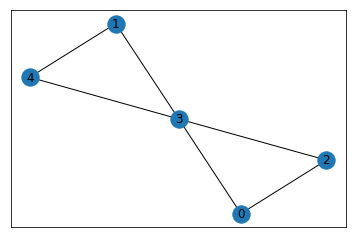

In [193]:
# Generamos un grafo aleatorio con 5 nodos y 6 aristas
g = nx.gnm_random_graph(n=5, m=6)

# Visualizamos el grafo generado
nx.draw_networkx(g)

#### 1.1.1 Propiedades del modelo del grafo aleatorio uniforme 

Vamos a comprobar las propiedades de este modelo que hemos visto en el capítulo 5 del libro *Análisis de datos de redes sociales*.

Sabemos que el número de posibles aristas de un grafo de $n$ nodos viene dado por la expresión:
$${n\choose 2}$$

que representa el número de posibles maneras de escoger un par de nodos de un grafo de $n$ nodos. Una alternativa para visualizar el número de posibles aristas de un grafo es generar y visualizar el grafo completo que tiene el mismo número de nodos. Obviamente, esta solución solo es viable para grafos muy pequeños, pero puede sernos útil para ver gráficamente cuántas aristas puede tener, como máximo, un grafo.

El número de posibles aristas de un grafo de 4 nodos es: 6


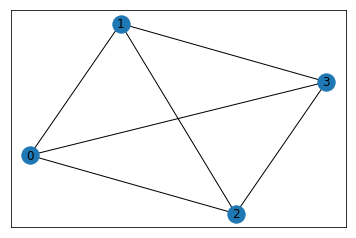

In [194]:
# Creamos un grafo completo de 4 nodos
g = nx.complete_graph(n=4)

# Visualizamos el grafo
nx.draw_networkx(g)

# Mostramos el número de aristas
print("El número de posibles aristas de un grafo de 4 nodos es: {}".format(g.number_of_edges()))

Comprobamos que el resultado coincide con la fórmula dada:

In [195]:
# Importamos factorial de la librería math
from math import factorial

# Creamos una función para calcular coeficientes binomiales
def binomial_coefficient(n, k):
    """
    Calcula el coeficiente binomial:
    n! / ( k! (n-k)! )
    """
    return factorial(n) // factorial(k) // factorial(n-k)

# Llamamos a la función anterior para calcular el número de posibles aristas
# de un grafo de 4 nodos
m = binomial_coefficient(4, 2)
print("El número de posibles aristas de un grafo de 4 nodos es: {}".format(m))

El número de posibles aristas de un grafo de 4 nodos es: 6


A partir del número de posibles aristas del grafo, podemos calcular el número de grafos distintos con $n$  nodos y $m$ aristas:

$$\#\{G_{ru}(n, m)\} = {{{n\choose 2} }\choose m}$$ 

que representa el número de posibles maneras de escoger $m$ aristas entre las posibles.

Para ver el correcto funcionamiento de la función [`gnp_random_graph`](https://networkx.github.io/documentation/stable/reference/generated/networkx.generators.random_graphs.gnm_random_graph.html#networkx.generators.random_graphs.gnm_random_graph), crearemos una función que genere grafos aleatorios repetidamente, y guardaremos el número de grafos diferentes que se generan, así como el número de veces que se ha generado cada grafo. De este modo, podremos comprobar que la función está generando todos los posibles grafos y, además, veremos que lo está haciendo de manera aleatoria uniforme. 

In [196]:
def generate_gnm_graphs(n, m, num_its=1000, directed=False):
    """
    La función genera num_its grafos aleatorios de n nodos y m aristas
    usando la función gnm_random_graph, y devuelve un diccionario
    con los diferentes grafos generados y el número de veces que se ha 
    generado cada grafo.
    """
    generated_graphs = {}
    for _ in range(num_its):
        # Generamos un grafo aleatorio
        g = nx.gnm_random_graph(n=n, m=m, directed=directed)
        # Generamos una representación en forma de cadena de caracteres del grafo generado
        # para poderla usar como clave del diccionario
        g_str = str(nx.adjacency_matrix(g))
        # Actualizamos el contador de grafos
        if g_str in generated_graphs:
            generated_graphs[g_str][0] += 1
        else:
            # Además del número de veces que se genera cada grafo, guardamos una copia del grafo
            # para poderlo visualizar posteriormente
            generated_graphs[g_str] = [1, g]
    return generated_graphs

In [197]:
# Generamos grafos aleatorios de 4 nodos y 2 aristas
n, m = 4, 2
generated_graphs = generate_gnm_graphs(n=n, m=m, num_its=10000)

print("El número de grafos diferentes generados de {} nodos y {} aristas es: {}"
      .format(n, m, len(generated_graphs.keys())))

El número de grafos diferentes generados de 4 nodos y 2 aristas es: 15


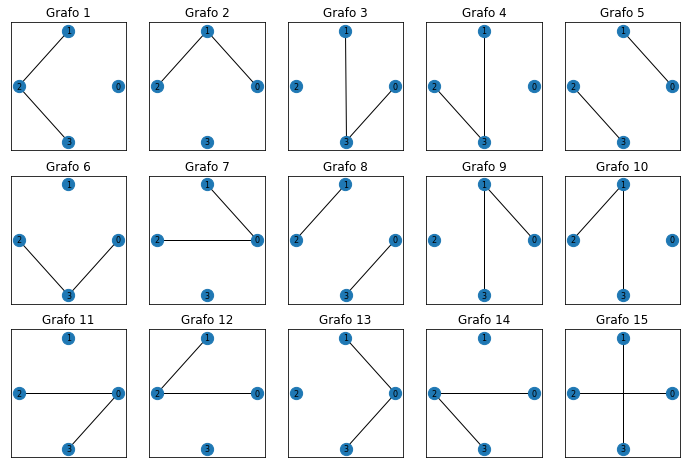

In [198]:
# Visualizamos los 15 grafos con 4 nodos y 2 aristas que existen
plt.figure(num=None, figsize=(12, 8))
for i, v in enumerate(generated_graphs.values()):
    ax = plt.subplot(3, 5, i+1)
    pos = nx.kamada_kawai_layout(g)
    nx.draw_networkx(v[1], node_size=150, font_size=8, pos=pos)
    ax.set_title("Grafo {}".format(i+1))

Vamos a comprobar que el resultado empírico coincide con el valor teórico:

In [199]:
# Creamos una función que calcule el número de grafos existentes de n nodos y m aristas
# usando la fórmula con los coeficientes binomiales
def num_existing_graphs(n, m):
    return binomial_coefficient(binomial_coefficient(n, 2), m)

# Usamos la función anterior para  calcular el número de grafos de 4 nodos y 2 aristas
num_graphs = num_existing_graphs(n, m)

print("El número de grafos diferentes que existen de {} nodos y {} aristas es: {}"
      .format(n, m, num_graphs))

El número de grafos diferentes que existen de 4 nodos y 2 aristas es: 15


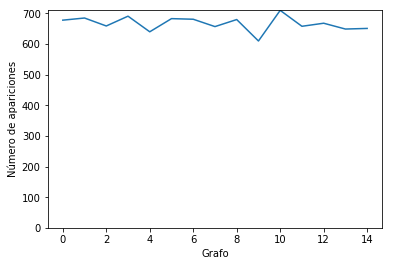

In [200]:
# Mostramos gráficamente cuántas veces se ha generado cada uno de los 15 grafos
num_times = [e[0] for e in generated_graphs.values()]
plt.plot(range(len(num_times)), num_times)
plt.ylim(0, max(num_times))
plt.xlabel("Grafo")
plt.ylabel("Número de apariciones")
plt.show()

Efectivamente, la función parece tener un comportamiento uniforme, ya que cada uno de los posibles grafos se genera número similar de veces.

#### 1.1.2 Eficiencia de las funciones de generación

Por último, vamos a revisar las diferencias entre las dos funciones de networkx que implementan el modelo del grafo aleatorio uniforme, [`gnm_random_graph`](https://networkx.github.io/documentation/stable/reference/generated/networkx.generators.random_graphs.gnm_random_graph.html#networkx.generators.random_graphs.gnm_random_graph) y [`dense_gnm_random_graph`](https://networkx.github.io/documentation/stable/reference/generated/networkx.generators.random_graphs.dense_gnm_random_graph.html#networkx.generators.random_graphs.dense_gnm_random_graph). La diferencia entre ambas funciones radica en su implementación, optimizada para tratar con grafos dipersos y densos, respectivamente. Un grafo disperso es aquel que tiene pocas aristas mientras que, por lo contrario, un grafo denso tiene muchas aristas (normalmente un número de aristas cercano al máximo posible).

In [201]:
def compare_executions_gnm(n, m):
    """
    Crea grafos de n nodos y m aristas con las funciones gnm_random_graph y 
    dense_gnm_random_graph y muestra el tiempo de ejecución.
    """
    print("Usando gnm_random_graph:")
    %timeit -n100 nx.gnm_random_graph(n, m)
    print("\nUsando dense_gnm_random_graph:")
    %timeit -n100 nx.dense_gnm_random_graph(n, m)

In [202]:
# Comparamos la ejecución de ambas funciones creando grafos dispersos
# de 100 nodos y solo 10 aristas
compare_executions_gnm(100, 10)

Usando gnm_random_graph:
109 µs ± 5.59 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)

Usando dense_gnm_random_graph:
5.22 ms ± 130 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [203]:
# Calculamos el número máximo de aristas de un grafo de 100 nodos
m = binomial_coefficient(100, 2)
print("El número de posibles aristas de un grafo de 100 nodos es: {}".format(m))

El número de posibles aristas de un grafo de 100 nodos es: 4950


In [204]:
# Comparamos la ejecución de ambas funciones creando grafos densos
# de 100 nodos y 4800 aristas
compare_executions_gnm(100, 4800)

Usando gnm_random_graph:
41.6 ms ± 1.98 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)

Usando dense_gnm_random_graph:
11.1 ms ± 316 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


Efectivamente, para crear un grafo disperso (en el ejemplo, 100 nodos y 10 aristas) la función [`gnm_random_graph`](https://networkx.github.io/documentation/stable/reference/generated/networkx.generators.random_graphs.gnm_random_graph.html#networkx.generators.random_graphs.gnm_random_graph) es mucho más rápida, mientras que para crear un grafo denso (en el ejemplo, 100 nodos y 4800 aristas) la función [`dense_gnm_random_graph`](https://networkx.github.io/documentation/stable/reference/generated/networkx.generators.random_graphs.dense_gnm_random_graph.html#networkx.generators.random_graphs.dense_gnm_random_graph) es más rápida.

### 1.2 El modelo de Gilbert

Networkx permite crear grafos con el modelo de Gilbert a través de las funciones [`gnp_random_graph`](https://networkx.github.io/documentation/stable/reference/generated/networkx.generators.random_graphs.gnp_random_graph.html) y [`fast_gnp_random_graph`](https://networkx.github.io/documentation/stable/reference/generated/networkx.generators.random_graphs.fast_gnp_random_graph.html#networkx.generators.random_graphs.fast_gnp_random_graph), que reciben como parámetros el número de nodos, $n$, y la probabilidad de crear una arista entre cualquier par de nodos, $p$.

Veamos un ejemplo sencillo de creación de un grafo con una de estas funciones:

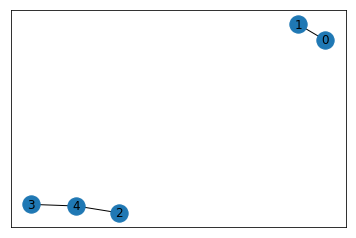

In [205]:
# Generamos un grafo aleatorio con 5 nodos, uniendo cada par de ellos por una arista
# con probabilidad 0.6
g = nx.gnp_random_graph(n=5, p=0.6)

# Visualizamos el grafo generado
nx.draw_networkx(g)

#### 1.2.1 Propiedades básicas del modelo de Gilbert

A diferencia del modelo del grafo aleatorio uniforme, los grafos generados con el modelo de Gilbert no siempre tienen el mismo número de aristas. Veamos la distribución del número de aristas de grafos generados con este modelo.

In [206]:
def generate_gnp_graphs(n, p, num_its=1000):
    """
    La función genera num_its grafos aleatorios de n nodos con probabilidad p de
    generar cada posible arista usando la función gnp_random_graph, y devuelve
    dos listas:
    - una lista con el número de aristas de los grafos generados 
    - una lista de listas con los grados de los nodos de los grafos generados
    """
    num_edges = []
    node_degrees = []
    for _ in range(num_its):
        # Generamos un grafo aleatorio
        g = nx.gnp_random_graph(n=n, p=p)
        # Guardamos el número de aristas del grafo generado
        num_edges.append(g.number_of_edges())
        node_degrees.append([d for (node, d) in g.degree()])
    return num_edges, node_degrees

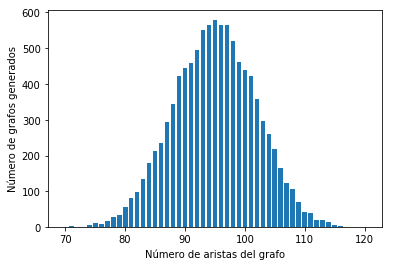

In [207]:
# Mostramos gráficamente el número de veces que se han generado grafos con un determinado
# número de aristas

from collections import Counter

# Generamos 10.000 grafos de 20 nodos con p = 0.5
num_edges, node_degrees = generate_gnp_graphs(n=20, p=0.5, num_its=10000)
# Contamos cuántas veces aparecen cada número de aristas
ctr_edges = Counter(num_edges)
x, y = zip(*[(k, v) for k, v in ctr_edges.items()])
# Generamos un diagrama de barras
plt.bar(x, y)
plt.xlabel("Número de aristas del grafo")
plt.ylabel("Número de grafos generados")
plt.show()

El número esperado de aristas de un grafo generado con el modelo de Gilbert es:

$$p{n\choose 2}$$

Comprobemos el resultado obtenido teóricamente con los grafos que genera la función Networkx mediante la función [`gnp_random_graph`](https://networkx.github.io/documentation/stable/reference/generated/networkx.generators.random_graphs.gnp_random_graph.html):

In [208]:
# Definimos una función que calcula el número de aristas esperado
# usando la fórmula con los coeficientes binomiales
def expected_num_of_edges(n, p):
    return p*binomial_coefficient(n, 2)

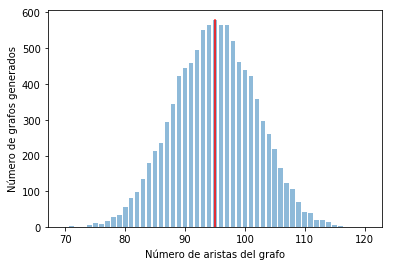

In [209]:
# Comparamos el resultado teórico con los grafos obtenidos con la
# función gnp_random_graph
m = expected_num_of_edges(n=20, p=0.5)

# Mostramos los valores observados con barras azules y el valor
# teórico en rojo
plt.bar(x, y, alpha=0.5)
plt.plot([m, m], [0, max(y)], 'r')
plt.xlabel("Número de aristas del grafo")
plt.ylabel("Número de grafos generados")
plt.show()

Por lo que respecta al grado esperado de un nodo en un grafo generado por el modelo de Gilbert, este es de:

$$p(n-1)$$

De nuevo, vamos a compararlo con los valores obtenidos en los grafos generados con networkx:

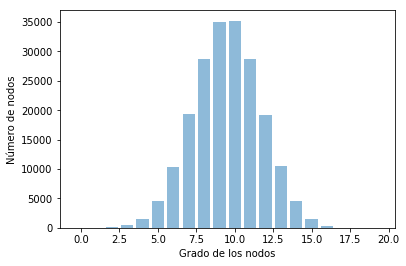

In [210]:
# Mostramos gráficamente el número de nodos que se han generado en
# todos los grafos con cada valor de grado

all_degrees = [d for deg_dist in node_degrees for d in deg_dist]
ctr_degrees = Counter(all_degrees)
x, y = zip(*[(k, v) for k, v in ctr_degrees.items()])

plt.bar(x, y, alpha=0.5)
plt.xlabel("Grado de los nodos")
plt.ylabel("Número de nodos")
plt.show()

In [211]:
# Definimos una función que calcula el grado esperado de un nodo
# de un grafo generado por el modelo de Gilbert
def expected_degree(n, p):
    return p*(n-1)

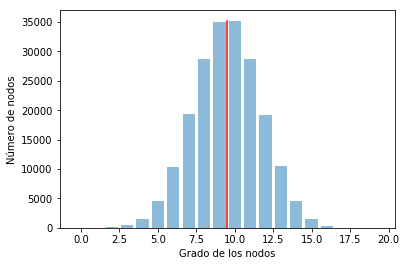

In [212]:
# Comparamos el resultado teórico con los grafos obtenidos con la
# función gnp_random_graph
d = expected_degree(n=20, p=0.5)

# Mostramos los valores observados con barras azules y el valor
# teórico en rojo
plt.bar(x, y, alpha=0.5)
plt.plot([d, d], [0, max(y)], 'r')
plt.xlabel("Grado de los nodos")
plt.ylabel("Número de nodos")
plt.show()

#### 1.2.2 Transiciones de fase

Los grafos generados por el modelo de Gilbert tienen una transición de fase en el tamaño de
la componente gigante (en $p = 1/n$) y en la conectividad (en $p = log(n)/n$). Vamos a observar como se manifestan estas transiciones usando grafos generados por la función [`gnp_random_graph`](https://networkx.github.io/documentation/stable/reference/generated/networkx.generators.random_graphs.gnm_random_graph.html#networkx.generators.random_graphs.gnm_random_graph).

En primer lugar, creamos dos funciones que nos devuelven el valor de $p$ en el que se produce cada una de las transiciones de fase en función del número de nodos del grafo:

In [213]:
from math import log

def pt_giant_component(n):
    """
    Devuelve el valor p dónde se produce la transición de fase 
    en el tamaño de la componente gigante.
    """
    return 1/n

def pt_connectivity(n):
    """
    Devuelve el valor p dónde se produce la transición de fase 
    en la conectividad del grafo.
    """
    return log(n)/n

Creamos también una función que nos permita visualizar la componente gigante de un grafo:

In [214]:
def draw_g_giant_component(g, node_size=50):
    """
    Visualiza un grafo resaltando los nodos y las aristas que pertenecen
    a la componente gigante del grafo
    """
    
    # Mostramos el grafo completo en gris usando un layout circular
    pos = nx.circular_layout(g)
    nx.draw_networkx(g, pos, node_color='#ACA7A7', node_size=node_size, alpha=1, with_labels=False)
    
    # Repintamos los nodos y los que pertenecen a la componente gigante
    # en azul
    gcc = sorted(nx.connected_component_subgraphs(g), key = len, reverse=True)
    giant_component = gcc[0]

    nx.draw_networkx_nodes(giant_component, pos, node_color='#016db5', node_size=node_size, alpha=1)
    nx.draw_networkx_edges(giant_component, pos, edge_color='#0099ff', alpha=0.6, width=5.0)
    
    return len(giant_component)

Ahora, usaremos las funciones anteriores para visualizar un grafo de 20 nodos, para valores de $p$ inmediatamente inferiores y superiores al punto en el que se produce la transición de fase respecto a la componente gigante del grafo:

La transición de fase de componente gigante se encuentra en p = 0.05


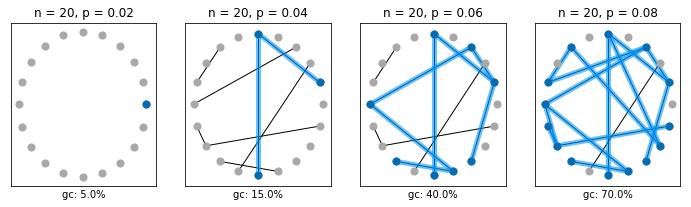

In [215]:
# Generamos 4 grafos de 20 nodos con el modelo de Gilbert, para valores de 
# p cercanos al punto de transición de fase de componente gigante y los visualizamos
# resaltando la componente gigante
n = 20
deltas = [-0.03, -0.01, 0.01, 0.03]
pt_giant = pt_giant_component(n)
print("La transición de fase de componente gigante se encuentra en p = {}".format(pt_giant))

plt.figure(num=None, figsize=(12, 3))
for i, d in enumerate(deltas):
    ax = plt.subplot(1, 4, i+1)
    p = pt_giant + d
    g = nx.gnp_random_graph(n=n, p=p, seed=41)
    giant_component = draw_g_giant_component(g)
    ax.set_title("n = {}, p = {:.2f}".format(n, p))
    ax.set_xlabel('gc: {}%'.format(giant_component/g.number_of_nodes()*100))


Fijaros que en los dos primeros grafos, generados con valores de $p$ inferiores a $0.05$, la componente gigante es inexistente (la mayor componente reúne únicamente a tres nodos, y no es la única componente que agrupa tres nodos). En cambio, al generar grafos con $p$ por encima de $0.05$, aparece una componente gigante, que agrupa al $40\%$ de los nodos para el grafo generado con $p=0.06$ y al $70\%$ de ellos para $p=0.08$.

Notad que, en el ejemplo, se hace uso del parámetro `seed`. En la sección [5.1 - Reproducibilidad](#5.1-Reproducibilidad) explicaremos con más detalle el uso de este parámetro en las funciones de generación de grafos.

Repetiremos ahora el proceso para valores cercanos al punto de transición de fase respecto a la conectividad del grafo:

La transición de fase de conectividad se encuentra en p = 0.02649158683274018


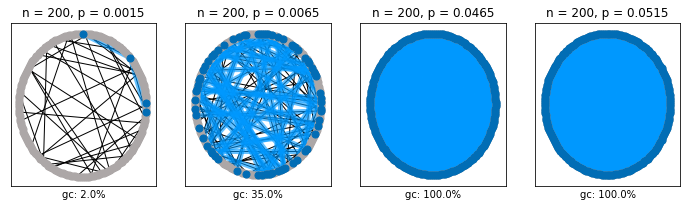

In [216]:
# Generamos 4 grafos de 20 nodos con el modelo de Gilbert, para valores de 
# p cercanos al punto de transición de fase de conectividad y los visualizamos
# resaltando la componente gigante
n = 200
deltas = [-0.025, -0.02, 0.02, 0.025]
pt_conn = pt_connectivity(n)
print("La transición de fase de conectividad se encuentra en p = {}".format(pt_conn))


plt.figure(num=None, figsize=(12, 3))
for i, d in enumerate(deltas):
    ax = plt.subplot(1, 4, i+1)
    p = pt_conn + d
    g = nx.gnp_random_graph(n=n, p=p, seed=42)
    giant_component = draw_g_giant_component(g)
    ax.set_title("n = {}, p = {:.4f}".format(n, p))
    ax.set_xlabel('gc: {}%'.format(giant_component/g.number_of_nodes()*100))



En este caso, para valores de $p$ inferiores a $0.026$, el grafo es disconexo (para $p=0.0065$, solo el $35%$ de los nodos están en la componente gigante, y el resto de los nodos del grafo se encuentran en otras componentes). En cambio, al generar grafos con $p$ por encima de $0.026$, el grafo pasa a ser conexo, de manera que existe un camino entre cualquier par de nodos del grafo (la componente gigante comprende todos los nodos del grafo).

#### 1.2.3 Eficiencia de las funciones de generación

Del mismo modo que con las variantes gnm, networkx dispone de dos funciones que implementan el modelo de Gilbert, [`gnp_random_graph`](https://networkx.github.io/documentation/stable/reference/generated/networkx.generators.random_graphs.gnp_random_graph.html) y [`fast_gnp_random_graph`](https://networkx.github.io/documentation/stable/reference/generated/networkx.generators.random_graphs.fast_gnp_random_graph.html#networkx.generators.random_graphs.fast_gnp_random_graph), que difieren en la implementación del modelo. La función [`fast_gnp_random_graph`](https://networkx.github.io/documentation/stable/reference/generated/networkx.generators.random_graphs.fast_gnp_random_graph.html#networkx.generators.random_graphs.fast_gnp_random_graph) está optimizada para tratar con grafos dispersos, por lo que es más rápida que [`gnp_random_graph`](https://networkx.github.io/documentation/stable/reference/generated/networkx.generators.random_graphs.gnp_random_graph.html) para este tipo de grafos:

In [217]:
def compare_executions_gnp(n, p):
    """
    Crea grafos de n nodos uniendo cada par de ellos con probabilidad p con las 
    funciones gnp_random_graph y fast_gnp_random_graph y muestra el tiempo de ejecución.
    """
    print("Usando gnp_random_graph:")
    %timeit -n100 nx.gnp_random_graph(n, p)
    print("\nUsando fast_gnp_random_graph:")
    %timeit -n100 nx.fast_gnp_random_graph(n, p)

In [218]:
# Comparamos la ejecución de ambas funciones creando grafos dispersos
# de 100 nodos con p = 0.01
compare_executions_gnp(100, 0.01)

Usando gnp_random_graph:
784 µs ± 93 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)

Usando fast_gnp_random_graph:
159 µs ± 4.05 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [219]:
# Comparamos la ejecución de ambas funciones creando grafos densos
# de 100 nodos con p = 0.9
compare_executions_gnp(100, 0.9)

Usando gnp_random_graph:
5.19 ms ± 149 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)

Usando fast_gnp_random_graph:
7.13 ms ± 487 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


La función [`fast_gnp_random_graph`](https://networkx.github.io/documentation/stable/reference/generated/networkx.generators.random_graphs.fast_gnp_random_graph.html#networkx.generators.random_graphs.fast_gnp_random_graph) es más rápida en crear grafos poco dispersos (en el ejemplo, grafos con $p = 0.01$) mientras que [`gnp_random_graph`](https://networkx.github.io/documentation/stable/reference/generated/networkx.generators.random_graphs.gnp_random_graph.html) es más rápida cuando los grafos que se van a generar son densos (en el ejemplo, $p = 0.9$).

Como último apunte, notad que networkx dispone de dos alias adicionales para la función [`gnp_random_graph`](https://networkx.github.io/documentation/stable/reference/generated/networkx.generators.random_graphs.gnp_random_graph.html): [`binomial_graph`](https://networkx.github.io/documentation/stable/reference/generated/networkx.generators.random_graphs.binomial_graph.html#networkx.generators.random_graphs.binomial_graph) y [`erdos_renyi_graph`](https://networkx.github.io/documentation/stable/reference/generated/networkx.generators.random_graphs.erdos_renyi_graph.html#networkx.generators.random_graphs.erdos_renyi_graph).

## 2. Modelos con distribución de grados específica

La librería networkx incorpora también las dos variantes de modelos con distribución de grados específica que se describen en el libro *Análisis de datos de redes sociales*: el modelo de configuración y el modelo de grafo aleatorio con distribución de grados esperada.

### 2.1 El modelo de configuración

Networkx dispone de la función [`configuration_model`](https://networkx.github.io/documentation/stable/reference/generated/networkx.generators.degree_seq.configuration_model.html), que permite crear grafos aleatorios con una secuencia de grados determinada usando el modelo de configuración. Veamos un ejemplo sencillo de su uso:

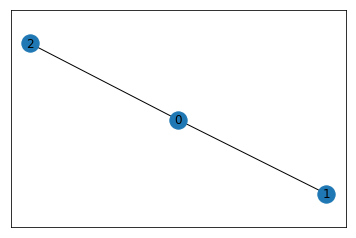

In [220]:
# Creamos un grafo de tres nodos con secuencia de grados 2, 1, 1
g = nx.configuration_model([2, 1, 1])

# Mostramos el grafo creado
nx.draw_networkx(g)

Podemos comprobar que los grafos generados con este modelo tienen exactamente la secuencia de grados especificada:

In [221]:
# Seleccionamos una secuencia de grados
target_deg_distr = [4, 3, 3, 3, 2, 2, 1]

# Creamos un grafo con esta secuencia usando el modelo de configuración
g = nx.configuration_model(target_deg_distr)

# Calculamos la distribución de grados del grafo generado
deg_distr = [n[1] for n in g.degree()]

# Comparamos ambas secuencias
print("Secuencia original: {}".format(target_deg_distr))
print("Secuencia obtenida: {}".format(deg_distr))
print("¿Son iguales las secuencias?: {}".format(deg_distr == target_deg_distr))

Secuencia original: [4, 3, 3, 3, 2, 2, 1]
Secuencia obtenida: [4, 3, 3, 3, 2, 2, 1]
¿Son iguales las secuencias?: True


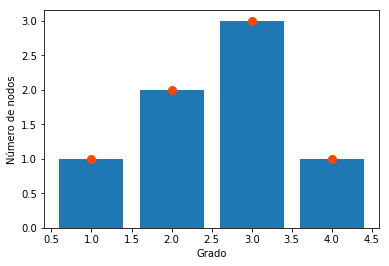

In [222]:
# Generamos una visualización gráfica de ambas distribuciones

# Contamos cuántas veces aparece cada grado en ambas distribuciones
ctr_target_deg = Counter(target_deg_distr)
x1, y1 = zip(*[(k, v) for k, v in ctr_target_deg.items()])

ctr_deg = Counter(deg_distr)
x2, y2 = zip(*[(k, v) for k, v in ctr_deg.items()])

# Generamos un diagrama de barras con los valores observados añadiendo puntos en los 
# valores originales
plt.bar(x2, y2)
plt.plot(x1, y1, 'o', color='orangered', markersize=8)
plt.xlabel("Grado")
plt.ylabel("Número de nodos")
plt.show()

Como podemos comprobar tanto analíticamente como gráficamente, la secuencia de grados especificada y la secuencia de grados que tiene el grafo generado coinciden.

Con el modelo de configuración, la probabilidad de generar cada posible grafo con una secuencia de grados concreta no es siempre la misma, ya que esta depende del número de emparejamientos diferentes que lleven a la misma red. Veámoslo con el ejemplo de generación de grafos con secuencia [2, 1, 1].

In [223]:
def generate_conf_graphs(deg_seq, num_its=1000):
    """
    La función genera num_its grafos aleatorios con la secuencia de grados
    deg_seq usando la función configuration_model, y devuelve un diccionario
    con los diferentes grafos generados y el número de veces que se ha 
    generado cada grafo.
    """
    generated_graphs = {}
    for _ in range(num_its):
        # Generamos un grafo aleatorio con el modelo de configuración
        g = nx.configuration_model(deg_seq)
        # Generamos una representación en forma de cadena de caracteres del grafo generado
        # para poderla usar como clave el diccionario
        g_str = str(nx.adjacency_matrix(g))
        # Actualizamos el contador de grafos
        if g_str in generated_graphs:
            generated_graphs[g_str][0] += 1
        else:
            # Además del número de veces que se genera cada grafo, guardamos una copia del grafo
            # para poderlo visualizar
            generated_graphs[g_str] = [1, g]
    return generated_graphs

In [224]:
# Generamos grafos aleatorios con distribución de grados [2, 1, 1]
deg_distr = [2, 1, 1]
generated_graphs = generate_conf_graphs(deg_distr)

print("El número de grafos diferentes generados con secuencia de grados {} es: {}"
      .format(deg_distr, len(generated_graphs.keys())))

El número de grafos diferentes generados con secuencia de grados [2, 1, 1] es: 2


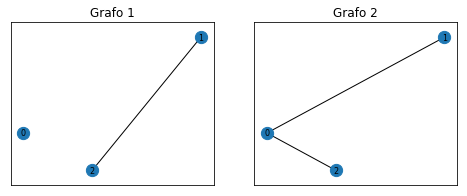

In [225]:
# Visualizamos los 2 grafos diferentes que existen con secuencia [2, 1, 1]
plt.figure(num=None, figsize=(8, 3))
for i, v in enumerate(generated_graphs.values()):
    ax = plt.subplot(1, 2, i+1)
    pos = nx.kamada_kawai_layout(g)
    nx.draw_networkx(v[1], node_size=150, font_size=8, pos=pos)
    ax.set_title("Grafo {}".format(i+1))

Hay dos detalles importantes que se han de tener en cuenta a la hora de interpretar el resultado del código anterior. 

Por un lado, al especificar la secuencia [2, 1, 1] estamos indicando implícitamente que el nodo 0 tendrá grado 2, el nodo 1 tendrá grado 1, y el nodo 2 tendrá grado 1. Así pues, otros grafos que también tengan un nodo con grado 2 y dos nodos con grado 1, pero con asignaciones distintas, quedarán siempre descartados y no se generarán. Por ejemplo, el siguiente grafo nunca se generaría:

La secuencia de grados es: [1, 2, 1]


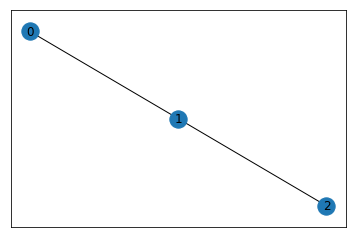

In [226]:
# Generamos un grafo con un nodo de grado 2 y dos nodos de grado 1 que nunca será generado
# al especificar la secuencia [2, 1, 1]
g_diff = nx.Graph()
g_diff.add_edges_from([(0, 1), (1, 2)])

# Mostramos el grafo
nx.draw_networkx(g_diff)

# Mostramos la distribución de grados del grafo
deg_distr = [n[1] for n in g_diff.degree()]
print("La secuencia de grados es: {}".format(deg_distr))

Por otro lado, el nodo 0 siempre tiene grado 2, aunque no se aprecie correctamente en una de las dos visualizaciones generadas. Esto es así ya que networkx no es capaz de mostrar los bucles (las aristas que tienen como origen y destino el mismo nodo), por lo que a primera vista puede parecer que el grafo generado es incorrecto.

La secuencia de grados es: [2, 1, 1]
Los nodos con bucles son: [0]


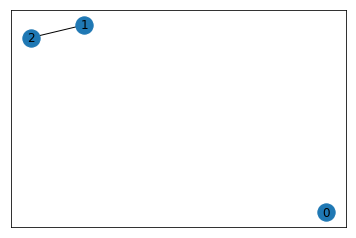

In [227]:
# Generamos un grafo con un bucle en el nodo 0 y comprobamos cómo se visualiza
g_selfloop = nx.Graph()
g_selfloop.add_edges_from([(0, 0), (1, 2)])

# Mostramos el grafo
nx.draw_networkx(g_selfloop)

# Mostramos la secuencia de grados del grafo
deg_distr = [n[1] for n in g_selfloop.degree()]
print("La secuencia de grados es: {}".format(deg_distr))

# Mostramos los nodos con bucles
print("Los nodos con bucles son: {}".format([a for a in g_selfloop.nodes_with_selfloops()]))

Por último, comprobemos que el número de veces que se ha generado cada uno de los dos grafos no es el mismo (hay dos emparejamientos que llevan al grafo con aristas [(0, 1), (0, 2)] y solo un emparejamiento que lleva al grafo con aristas [(0, 0), (1, 2)]:
 

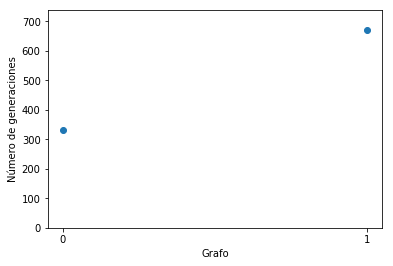

In [228]:
# Mostramos gráficamente cuántas veces se ha generado cada uno de los 2 grafos
num_times = [e[0] for e in generated_graphs.values()]
plt.plot(range(len(num_times)), num_times, 'o')
plt.ylim(0, max(num_times)*1.1)
plt.xticks([0, 1])
plt.xlabel("Grafo")
plt.ylabel("Número de generaciones")
plt.show()

### 2.2 Modelo de grafo aleatorio con distribución de grados esperada

Networkx implementa el modelo de grafo aleatorio con distribución de grados esperada a través de la función [`expected_degree_graph`](https://networkx.github.io/documentation/stable/reference/generated/networkx.generators.degree_seq.expected_degree_graph.html#networkx.generators.degree_seq.expected_degree_graph) que, del mismo modo que la función que implementa el modelo de configuración, recibe como parámetro obligatorio una lista de grados. Veamos un ejemplo sencillo de creación de un grafo con este modelo:

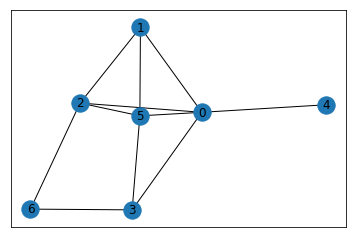

In [229]:
# Seleccionamos una secuencia de grados y generamos un grafo con el modelo
# de grafo aleatorio con distribución de grados esperada
target_deg_distr = [4, 3, 3, 3, 2, 2, 1]
g = nx.expected_degree_graph(target_deg_distr)

# Mostramos el grafo generado
nx.draw_networkx(g)

A diferencia del modelo de configuración, el modelo de grafo aleatorio con distribución de grados esperada puede generar grafos con secuencias de grados diferentes a la especificada.

In [230]:
# Seleccionamos una secuencia de grados
target_deg_distr = [4, 3, 3, 3, 2, 2, 1]

# Creamos un grafo con esta secuencia usando el modelo de grafo 
# aleatorio con distribución de grados esperada
g = nx.expected_degree_graph(target_deg_distr)

# Calculamos la distribución de grados del grafo generado
deg_distr = [n[1] for n in g.degree()]

# Comparamos ambas distribuciones
print("Secuencia original: {}".format(target_deg_distr))
print("Secuencia obtenida: {}".format(deg_distr))
print("¿Son iguales las secuencias?: {}".format(deg_distr == target_deg_distr))

Secuencia original: [4, 3, 3, 3, 2, 2, 1]
Secuencia obtenida: [6, 3, 6, 3, 3, 1, 0]
¿Son iguales las secuencias?: False


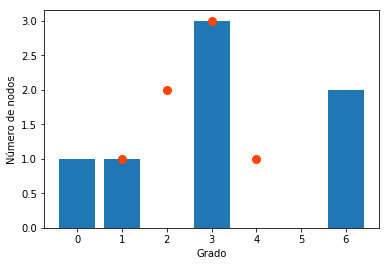

In [231]:
# Generamos una visualización gráfica de ambas distribuciones

# Contamos cuántas veces aparece cada grado en ambas distribuciones
ctr_target_deg = Counter(target_deg_distr)
x1, y1 = zip(*[(k, v) for k, v in ctr_target_deg.items()])

ctr_deg = Counter(deg_distr)
x2, y2 = zip(*[(k, v) for k, v in ctr_deg.items()])

# Generamos un diagrama de barras con los valores observados añadiendo puntos en los 
# valores especificados originalmente
plt.bar(x2, y2)
plt.plot(x1, y1, 'o', color='orangered', markersize=8)
plt.xlabel("Grado")
plt.ylabel("Número de nodos")
plt.show()

Como podemos apreciar, existen diferencias entre la secuencia de grados proporcionada originalmente (puntos de color naranja en el gráfico) y la secuencia de grados observada en el grafo generado (barras de color azul). Estas diferencias, que pueden parecer importantes, tienden a desaparecer al generar grafos grandes:

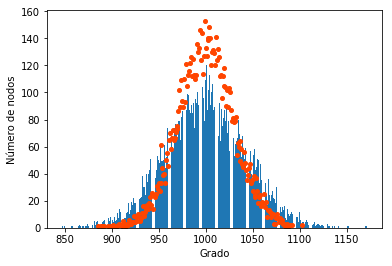

In [232]:
# Generamos una secuencia de grados válida a partir de generar un grafo gnp
g = nx.gnp_random_graph(10000, 0.1)
target_deg_distr = [n[1] for n in g.degree()]

# Creamos un grafo con esta secuencia usando el modelo de grafo 
# aleatorio con distribución de grados esperada
g = nx.expected_degree_graph(target_deg_distr)

# Calculamos la distribución de grados del grafo generado
deg_distr = [n[1] for n in g.degree()]

# Generamos una visualización gráfica de ambas distribuciones

# Contamos cuántas veces aparece cada grado en ambas distribuciones
ctr_target_deg = Counter(target_deg_distr)
x1, y1 = zip(*[(k, v) for k, v in ctr_target_deg.items()])

ctr_deg = Counter(deg_distr)
x2, y2 = zip(*[(k, v) for k, v in ctr_deg.items()])

# Generamos un diagrama de barras con los valores observados añadiendo puntos en los 
# valores especificados originalmente
plt.bar(x2, y2)
plt.plot(x1, y1, 'o', color='orangered', markersize=4)
plt.xlabel("Grado")
plt.ylabel("Número de nodos")
plt.show()

En el modelo de grafo aleatorio con distribución de grados esperada, dados dos nodos $v_i$ y $v_j$, la probabilidad de que exista una arista entre ellos viene dada por la siguiente expresión:

$$p_{ij} = \frac{d_i d_j}{\sum_{l=1}^{n}{d_l}}$$

Vamos a comprobarlo generando grafos con este modelo y observando cuántas veces se crea cada una de las posibles aristas del grafo. Compararemos el resultado obtenido con la probabilidad teórica:

In [233]:
def expected_degree_model_probs(deg_seq):
    """
    Dada una secuencia de grados, crea una matriz con las probabilidades p_ij
    de que exista una arista para cada par de nodos (v_, v_j) del grafo.
    """
    # Creamos una matriz de ceros cuadrada, con tantas filas y columnas como nodos
    num_nodes = len(deg_seq)
    acc_adj_matrix = np.zeros((num_nodes, num_nodes))    
    
    # Asignamos el valor di * dj a cada posición de la matriz
    for i, di in enumerate(deg_seq):
        for j, dj in enumerate(deg_seq):
            acc_adj_matrix[i][j] = di * dj
    s = sum(deg_seq)
    
    return acc_adj_matrix / s

def generate_expected_deg_graphs(orig_deg_dist, num_its=1000):
    """
    La función genera num_its grafos aleatorios con distribución esperada orig_deg_dist
    usando la función expected_degree_graph, y devuelve la matriz de adyacencia media
    generada (la suma de matrices de adyacencia dividida por el número de iteraciones realizadas).
    """
    # Creamos una matriz de ceros cuadrada, con tantas filas y columnas como nodos
    num_nodes = len(orig_deg_dist)
    acc_adj_matrix = np.zeros((num_nodes, num_nodes))
    
    # Acumulamos la matriz de adyacencia de los grafos generados
    for _ in range(num_its):
        g = nx.expected_degree_graph(orig_deg_dist)
        acc_adj_matrix += nx.adjacency_matrix(g)
        
    return acc_adj_matrix / num_its

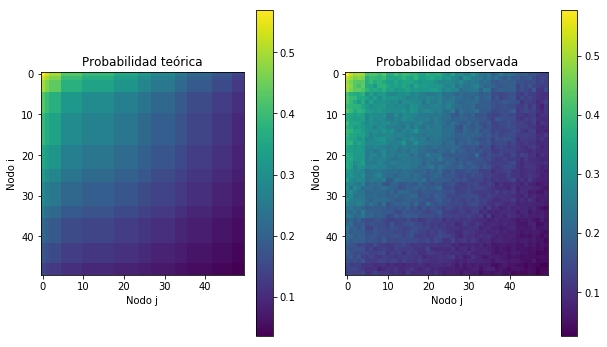

In [234]:
# Generamos una secuencia de grados válida a partir de generar un grafo gnp
g = nx.gnp_random_graph(50, 0.2)
target_deg_distr = sorted([n[1] for n in g.degree()], reverse=True)

# Calculamos las probabilidades teóricas y observadas de que exista una arista entre
# cada par de nodos del grafo
prob = expected_degree_model_probs(target_deg_distr)
obs_probs = generate_expected_deg_graphs(target_deg_distr)

# Mostramos gráficamente el resultado con un heatmap
plt.figure(num=None, figsize=(10, 6))

ax = plt.subplot(1, 2, 1)
ax.set_title("Probabilidad teórica")
im = ax.imshow(prob)
plt.xlabel('Nodo j')
plt.ylabel('Nodo i')
plt.colorbar(im)

ax = plt.subplot(1, 2, 2)
ax.set_title("Probabilidad observada")
im = ax.imshow(obs_probs)
plt.xlabel('Nodo j')
plt.ylabel('Nodo i')
plt.colorbar(im)

plt.show()

Las imágenes anteriores muestran la probabilidad de que exista una arista entre cada par de nodos, calculada teóricamente (izquierda) o experimentalmente con los grafos generados por la función [`expected_degree_graph`](https://networkx.github.io/documentation/stable/reference/generated/networkx.generators.degree_seq.expected_degree_graph.html#networkx.generators.degree_seq.expected_degree_graph) (derecha). Cada píxel de la imagen muestra la probabilidad de que haya una arista entre el nodo indicado en el eje de abscisas y el indicado en el eje de ordenadas. Las imágenes son simétricas respecto a la diagonal, ya que los grafos no son dirigidos. 

Así pues, como era de esperar, la probabilidad observada de que exista una arista entre cada par de nodos del grafo se aproxima al valor teórico del modelo.

### 2.3 Existencia del grafo con una secuencia de grados determinada

Como hemos visto, no todas las secuencias de grados son válidas, y hay algunas secuencias para las cuales no es posible crear un grafo que las genere. La función [`configuration_model`](https://networkx.github.io/documentation/stable/reference/generated/networkx.generators.degree_seq.configuration_model.html) lanzará una excepción si recibe como parámetro una secuencia para la cuál no puede generar un grafo. En cambio, [`expected_degree_graph`](https://networkx.github.io/documentation/stable/reference/generated/networkx.generators.degree_seq.expected_degree_graph.html#networkx.generators.degree_seq.expected_degree_graph) no producirá ninguna excepción, ya que puede generar grafos con secuencias parecidas a la proporcionada:

In [235]:
# Intentamos generar un grafo con secuencia de grados [1]
g = nx.expected_degree_graph([1])
deg_distr = [n[1] for n in g.degree()]
print("La función expected_degree_graph ha generado un grafo con secuencia de grados: {}".format(deg_distr))

print("\nLa función configuration_model genera una excepción al intentar generar el grafo")
try:
    g = nx.configuration_model([1])
except nx.NetworkXError:
    print("Se ha generado una excepción al intentar crear el grafo")


La función expected_degree_graph ha generado un grafo con secuencia de grados: [2]

La función configuration_model genera una excepción al intentar generar el grafo
Se ha generado una excepción al intentar crear el grafo


Para saber si una secuencia de grados es gráfica (es decir, si es la secuencia de grados de algún grafo simple), networkx incorpora la función [`is_valid_degree_sequence_erdos_gallai`](https://networkx.github.io/documentation/networkx-1.9/reference/generated/networkx.algorithms.graphical.is_valid_degree_sequence_erdos_gallai.html):

In [236]:
# Comprobamos si la secuencia de grados [1] es gráfica
deg_sq = [1]
is_graphical = nx.is_valid_degree_sequence_erdos_gallai(deg_sq)
print("¿La secuencia de grados {} es gráfica?: {}".format(deg_sq, is_graphical))

¿La secuencia de grados [1] es gráfica?: False


In [237]:
# Comprobamos si la secuencia de grados [4, 4, 3, 3, 2] es gráfica
deg_sq = [4, 4, 3, 3, 2]
is_graphical = nx.is_valid_degree_sequence_erdos_gallai(deg_sq)
print("¿La secuencia de grados {} es gráfica?: {}".format(deg_sq, is_graphical))

¿La secuencia de grados [4, 4, 3, 3, 2] es gráfica?: True


Como último apunte, es interesante notar que la función [`configuration_model`](https://networkx.github.io/documentation/stable/reference/generated/networkx.generators.degree_seq.configuration_model.html) será capaz de generar grafos para algunas secuencias no gráficas, ya que el modelo admite la creación de bucles:

In [238]:
# Comprobamos que la secuencia [6, 5, 5, 4, 2, 2, 2] no es gráfica
deg_sq = [6, 5, 5, 4, 2, 2, 2]
is_graphical = nx.is_valid_degree_sequence_erdos_gallai(deg_sq)
print("¿La secuencia de grados {} es gráfica?: {}".format(deg_sq, is_graphical))

# Generamos un grafo con el modelo de configuración usando la 
# secuencia de grados anterior
g = nx.configuration_model(deg_sq)
deg_distr = [n[1] for n in g.degree()]

# Mostramos los nodos con bucles
print("Los nodos con bucles son: {}".format([a for a in g.nodes_with_selfloops()]))

¿La secuencia de grados [6, 5, 5, 4, 2, 2, 2] es gráfica?: False
Los nodos con bucles son: [0, 1, 2, 3]


## 3. Modelos de redes *small world*: el modelo Watts-Strogatz

La función [`watts_strogatz_graph`](https://networkx.github.io/documentation/stable/reference/generated/networkx.generators.random_graphs.watts_strogatz_graph.html) de networkx permite crear grafos *small world* siguiendo el modelo de Watts-Strogatz. La función recibe tres parámetros obligatorios, el número de nodos $n$, el número de vecinos al que se conectará inicialmente cada nodo $k$, y la probabilidad de recablear cada conexión $p$.

Vamos a ver un ejemplo de creación de un grafo con este modelo:

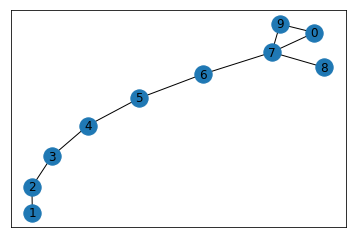

In [239]:
# Creamos un grafo de 10 nodos
g = nx.watts_strogatz_graph(n=10, k=3, p=0.5)

# Visualizamos el grafo creado
nx.draw_networkx(g)

Cuando la probabilidad de recablear las aristas es 0, los grafos generados por este modelo corresponden a grafos regulares. Visualicemos algunos ejemplos para diferentes valores de $k$:

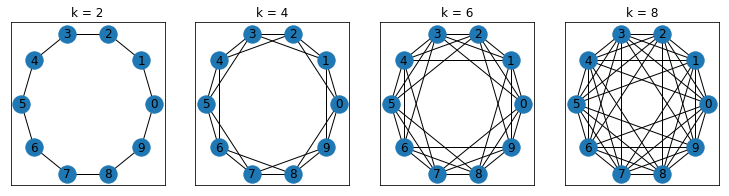

In [240]:
# Generamos 4 grafos con 10 nodos, variando el número de vecinos al que se conecta cada 
# nodo inicialmente, y con una probabilidad de recableado de 0
n, p = 10, 0
plt.figure(num=None, figsize=(16, 3))
for i, k in enumerate(range(2, 10, 2)):
    ax = plt.subplot(1, 5, i+1)
    # Generamos el grafo con el modelo Watts-Strogatz
    g = nx.watts_strogatz_graph(n=n, k=k, p=p)
    # Mostramos el grafo usando un layout circular
    pos = nx.circular_layout(g)
    nx.draw_networkx(g, pos=pos)
    ax.set_title("k = {}".format(k))

Notad que los grafos generados no únicamente son $k$-regulares, sino que los $k$ vecinos a los que está conectado cada nodo corresponden a los $k/2$ inmediatamente siguientes y los $k/2$ inmediatamente anteriores (considerando una ordenación circular, donde después del último nodo vuelve a aparecer el primero, y usando el identificador del nodo para establecer el orden). 

Hemos visto como afecta variar el valor $k$ sobre el grafo generado. Ahora veremos qué efecto tiene variar la probabilidad de recableado $p$ sobre los grafos generados por este modelo:

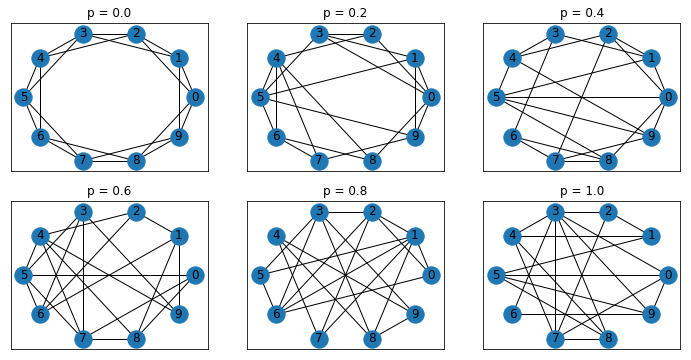

In [241]:
# Generamos 6 grafos con 10 nodos, con k = 4, variando la probabilidad de recableado
n, k = 10, 4
plt.figure(num=None, figsize=(12, 6))
num_of_edges = []
for i, p in enumerate(np.arange(0, 1.1, 0.2)):
    ax = plt.subplot(2, 3, i+1)
    # Generamos el grafo con el modelo Watts-Strogatz
    g = nx.watts_strogatz_graph(n=n, k=k, p=p)
    # Mostramos el grafo usando un layout circular
    pos = nx.circular_layout(g)
    nx.draw_networkx(g, pos=pos)
    ax.set_title("p = {:.2}".format(p))
    # Guardamos el número de aristas del grafo generado
    num_of_edges.append(g.number_of_edges())

Podemos ver que la estructura de anillo inicial, en la que cada nodo está conectado a sus $k/2$ vecinos inmediatamente siguientes y sus $k/2$ vecinos inmediatamente anteriores, se va perdiendo conforme aumentamos el valor de la probabilidad de recableado $p$.

Ahora bien, variar la probabilidad de recableado no afecta al número total de aristas del grafo, ya que cuando se recablea una arista, esta se "desconecta" de uno de los nodos y se "conecta" a un nuevo nodo. Es decir, al recablear una arista $(v_i, v_j)$, esta desaparece y se crea una nueva arista $(v_i, v_k$), por lo que el tamaño del grafo no se ve afectado por el recableado:

In [242]:
for e, p in zip(num_of_edges, np.arange(0, 1.1, 0.2)):
    print("El número de aristas del grafo con p = {:.2} es: {}".format(p, e))
    

El número de aristas del grafo con p = 0.0 es: 20
El número de aristas del grafo con p = 0.2 es: 20
El número de aristas del grafo con p = 0.4 es: 20
El número de aristas del grafo con p = 0.6 es: 20
El número de aristas del grafo con p = 0.8 es: 20
El número de aristas del grafo con p = 1.0 es: 20


Modificar los valores del número de vecinos y la probabilidad de recableado afecta a las propiedades del grafo que se genera. Veamos el impacto que tienen sobre el coeficiente de agrupamiento y la longitud de los caminos más cortos de los grafos generados:

In [243]:
from statistics import mean

def compute_mean_cc_sp_ws(n, k, p, num_its):
    """
    Crea num_its grafos con el modelo Watts-Strogatz con los parámetros
    n, k y p especificados, y devuelve la media de los valores de coeficiente
    de agrupación y media de los caminos más cortos de todos los grafos generados.
    """
    current_cc, current_sp = [], []
    for _ in range(num_its):
        g = nx.watts_strogatz_graph(n, k, p, seed=None)
        current_cc.append(nx.average_clustering(g))
        # en el caso de grafos disconnexos, debemos calcular el SP para cada componente y hacer la media
        tmp_cc = []
        for C in nx.connected_component_subgraphs(g):
            tmp_cc.append(nx.average_shortest_path_length(C))
        current_sp.append(mean(tmp_cc))
    return np.mean(current_cc), np.mean(current_sp)

In [244]:
# Calcula la media del coeficiente de agrupación y de los caminos más cortos
# de grafos generados con Watts-Strogatz, con n = 100, k = 10
# y p variando de 0.0001 a 1 
n, k, num_its = 100, 10, 30
ps = np.exp(np.linspace(np.log(0.0001), np.log(1), 20))
cc_sp = [compute_mean_cc_sp_ws(n, k, p, num_its) for p in ps]
cc, sp = zip(*cc_sp)

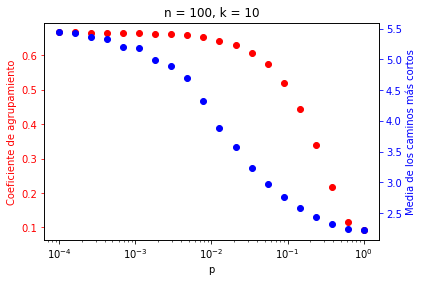

In [245]:
# Muestra la evolución del coeficiente de agrupamiento y la media de los caminos más
# cortos al variar la probabilidad de recableado p
fig, ax1 = plt.subplots()

ax1.set_xlabel('p')
ax1.set_xscale('log')

# Mostramos el coeficiente de agrupamiento en rojo
ax1.plot(ps, cc, 'ro')
ax1.set_ylabel('Coeficiente de agrupamiento', color='r')
ax1.tick_params('y', colors='r')

# Mostramos la media de los caminos más cortos en azul, generando un segundo
# eje para poder ver las dos escalas
ax2 = ax1.twinx()
ax2.plot(ps, sp, 'bo')
ax2.set_ylabel('Media de los caminos más cortos', color='b')
ax2.tick_params('y', colors='b')

# Añadimos el título de la gráfica y la mostramos
plt.title("n = {}, k = {}".format(n, k))
plt.show()

Como podemos observar en la gráfica anterior, fijando el número de nodos y el número inicial de vecinos, al aumentar la probabilidad de recableado, la red pasa a tener un coeficiente de agrupamiento menor (la probabilidad de que los vecinos de un nodo estén conectados entre ellos decrece) y la media de los caminos más cortos entre nodos también decrece (de media, la longitud del camino más corto entre dos nodos cualesquiera es menor, ya que se crean conexiones más allá de los vecinos más próximos).

Repitamos ahora el proceso fijando la probabilidad de recableado y variando el número inicial de vecinos $k$:

In [246]:
# Calcula la media del coeficiente de agrupación y de los caminos más cortos
# de grafos generados con wats strogatz, con n = 100, k = 10
# y p variando de 0.0001 a 1 
n, p, num_its = 100, 0.2, 10
ks = range(2, 30, 2)
cc_sp = [compute_mean_cc_sp_ws(n, k, p, num_its) for k in ks]
cc, sp = zip(*cc_sp)

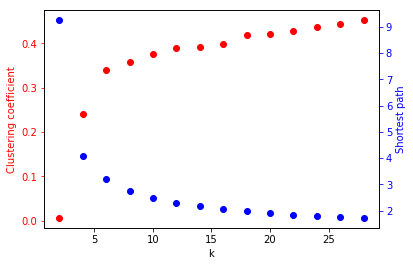

In [247]:
# Muestra la evolución del coeficiente de agrupamiento y la media de los caminos más
# cortos
fig, ax1 = plt.subplots()
ax1.set_xlabel('k')

# Mostramos el coeficiente de agrupamiento en rojo
ax1.plot(ks, cc, 'ro')
ax1.set_ylabel('Clustering coefficient', color='r')
ax1.tick_params('y', colors='r')

# Mostramos la media de los caminos más cortos en azul, generando un segundo
# eje para poder ver las dos escalas
ax2 = ax1.twinx()
ax2.plot(ks, sp, 'bo')
ax2.set_ylabel('Shortest path', color='b')
ax2.tick_params('y', colors='b')

# Añadimos el título de la gráfica y la mostramos
plt.show()

En cambio, fijando el número de nodos y la probabilidad de recableado, al aumentar el número inicial de vecinos a los que se conecta cada nodo la red pasa a tener un coeficiente de agrupamiento mayor. La media de los caminos más cortos entre nodos decrece, ya que al crear más aristas se crean también nuevos caminos que permiten disminuir la distancia entre nodos.

### 3.1 Variantes del modelo de Watts-Strogatz

La implementación del modelo Watts-Strogatz de la función [`watts_strogatz_graph`](https://networkx.github.io/documentation/stable/reference/generated/networkx.generators.random_graphs.watts_strogatz_graph.html) puede dar como resultado la generación de grafos no conexos (es decir, en grafos con más de una componente conexa). Esto es así ya que el algoritmo recablea las aristas según la probabilidad especificada, pero no tiene en cuenta las consecuencias del recableado en el grafo final:

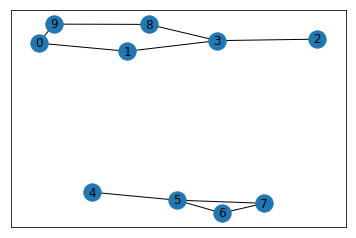

In [248]:
# Generamos y mostramos un grafo no conexo con el modelo Watts-Strogatz
g = nx.watts_strogatz_graph(n=10, k=2, p=0.1, seed=114)
nx.draw_networkx(g)

Si queremos asegurar que el grafo generado con Watts-Strogatz es un grafo conexo, podemos usar la función [`connected_watts_strogatz_graph`](https://networkx.github.io/documentation/stable/reference/generated/networkx.generators.random_graphs.connected_watts_strogatz_graph.html#networkx.generators.random_graphs.connected_watts_strogatz_graph), que retorna siempre un grafo dirigido (o bien un error si no se ha podido generar el grafo después de un número prefijado de intentos). Los parámetros que recibe esta función son análogos a los de la función [`watts_strogatz_graph`](https://networkx.github.io/documentation/stable/reference/generated/networkx.generators.random_graphs.watts_strogatz_graph.html), aunque también recibe el parámetro adicional `tries` que fija el número de intentos que pueden utilizarse en la generación del grafo:

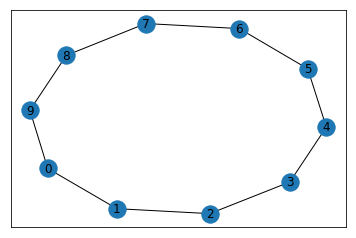

In [249]:
# Generamos y mostramos un grafo con la función connected_watts_strogatz_graph
g = nx.connected_watts_strogatz_graph(n=10, k=2, p=0.1, seed=114)
nx.draw_networkx(g)

In [250]:
# Generamos 2000 grafos aleatorios y comprobamos cuántos de ellos son conexos
# usando las funcions watts_strogatz_graph y connected_watts_strogatz_graph

n, k, p = 10, 2, 0.1
num_its = 2000

cws = [nx.is_connected(nx.connected_watts_strogatz_graph(n=n, k=k, p=p)) for _ in range(num_its)]
ws = [nx.is_connected(nx.watts_strogatz_graph(n=n, k=k, p=p)) for _ in range(num_its)]
     
print("Porcentaje de grafos conexos generados:")
print("\tUsando connected_watts_strogatz_graph: {:.2f}%".format(sum(cws)/num_its*100))
print("\tUsando watts_strogatz_graph: {:.2f}%".format(sum(ws)/num_its*100))

Porcentaje de grafos conexos generados:
	Usando connected_watts_strogatz_graph: 100.00%
	Usando watts_strogatz_graph: 98.05%


## 4. Modelos de crecimiento: el modelo Barabási-Albert

Networkx dispone de la función [`barabasi_albert_graph`](https://networkx.github.io/documentation/latest/reference/generated/networkx.generators.random_graphs.barabasi_albert_graph.html) que permite crear redes aleatorias siguiendo este modelo de conexión preferencial. La función recibe dos parámetros: el número de nodos del grafo que se va a generar y el número de aristas que se añaden cada vez que un nuevo nodo se conecta a la red. Veamos un ejemplo sencillo de su uso:

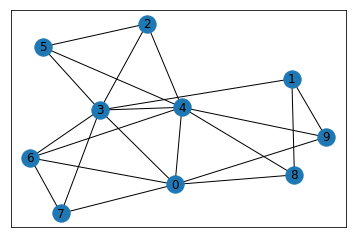

In [251]:
# Generamos un grafo aleatorio con 10 nodos
n, m = 10, 3
g = nx.barabasi_albert_graph(n=n, m=m)

# Visualizamos el grafo generado
pos = nx.kamada_kawai_layout(g)
nx.draw_networkx(g, pos=pos)

La variante del modelo de Barabási-Albert que implementa networkx inicializa el grafo con $m$ nodos sin ninguna arista, y después va añadiendo los $n-m$ nodos restantes, conectando cada uno de ellos a $m$ vecinos ya existentes en el grafo. Así, en un grafo generado con este algoritmo, todos los nodos (excepto quizás los $m$ iniciales) tienen como mínimo grado $m$:

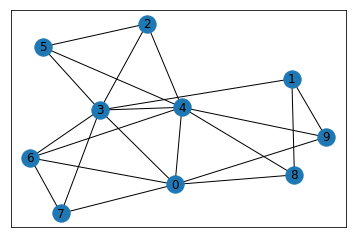

In [252]:
# Visualizamos el grafo generado, coloreando en rojo los nodos con grado
# menor a m
deg_dist_less_m = [n[0] for n in g.degree() if n[1] < m]
nx.draw_networkx(g, pos=pos)
_ = nx.draw_networkx_nodes(g, pos=pos, nodelist=deg_dist_less_m, node_color='#cc0000')


La característica más conocida del modelo de Barabási-Albert es que genera grafos con una distribución de grados que sigue la ley de potencia, de manera que la distribución de grados tiende a aproximarse a una recta cuando se muestra en escala logarítmica:

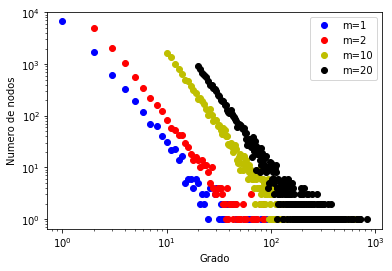

In [253]:
# Generamos grafos con 10K nodos y diferentes valores de m
n, ms = 10000, [1, 2, 10, 20]
gs = [nx.barabasi_albert_graph(n, m, seed=None) for m in ms]

# Generamos una gráfica con la distribución de grados de cada
# uno de los grafos generados
fig = plt.figure()
colors = ['bo', 'ro', 'yo', 'ko']
for i, g in enumerate(gs):
    degree_sequence = sorted([n[1] for n in nx.degree(g)], reverse=True)
    ctr_deg = Counter(degree_sequence)
    x, y = zip(*[(k, v) for k, v in ctr_deg.items()])
    plt.loglog(x, y, colors[i])
    
ms = ["m=1", "m=2", "m=10", "m=20"]
plt.legend(ms, numpoints=1)
plt.ylabel('Numero de nodos')
plt.xlabel('Grado')
plt.show() 

Así, los grafos generados por este modelo tienen unos pocos nodos con grado muy alto (los *hubs*), mucho mayor que la media del grafo. Veámoslo comparando el grado máximo de grafos con el mismo número de nodos y aristas generados con el modelo Barabási-Albert y con el modelo del grafo aleatorio uniforme:

In [254]:
# Generamos un grafo con 500 nodos con el modelo Barabási-Albert
n, m_ba = 500, 10
g_ba = nx.barabasi_albert_graph(n=n, m=m_ba)

# Generamos un grafo con 100 nodos y el mismo número de aristas
# con el modelo del grafo aleatorio uniforme
num_edges = g_ba.number_of_edges()
g_gnm = nx.gnm_random_graph(n=n, m=num_edges)

# Comparamos el grado máximo de los grafos generados
ba_max_deg = max([n[1] for n in g_ba.degree()])
gnm_max_de = max([n[1] for n in g_gnm.degree()])

print("El grado máximo del grafo generado con Barabási-Albert es: {}".format(ba_max_deg))
print("El grado máximo del grafo generado con Erdős-Rényi es: {}".format(gnm_max_de))

El grado máximo del grafo generado con Barabási-Albert es: 115
El grado máximo del grafo generado con Erdős-Rényi es: 32


## 5. Detalles adicionales: reproducibilidad y grafos dirigidos

Hasta ahora hemos presentado los modelos de generación de grafos aleatorios (no dirigidos) más populares. En esta sección veremos una característica común a todos ellos, que nos permite crear código reproducible, así como algunas variantes de los modelos con las que podemos crear grafos dirigidos.

### 5.1 Reproducibilidad

Las funciones que hemos visto hasta ahora permiten crear grafos aleatorios. Así pues, si las ejecutamos más de una vez con los mismos parámetros, generalmente devuelven grafos distintos. En ocasiones nos puede interesar volver a generar un mismo grafo varias veces (por ejemplo, para hacer que nuestro código sea reproducible). En este caso, podemos utilizar el parámetro opcional `seed` para fijar la semilla de aleatoriedad en la generación del grafo:

In [255]:
n, m = 100, 50

# Generamos dos grafos aleatorios gnm y los comparamos
g1 = nx.gnm_random_graph(n=n, m=m)
g2 = nx.gnm_random_graph(n=n, m=m)
print("Los grafos generados son iguales: {}".format(g1.nodes == g2.nodes and g1.edges == g2.edges))

# Generamos dos grafos aleatorios gnm usando la misma semilla y los comparamos
g3 = nx.gnm_random_graph(n=n, m=m, seed=42)
g4 = nx.gnm_random_graph(n=n, m=m, seed=42)
print("Los grafos generados son iguales: {}".format(g3.nodes == g4.nodes and g3.edges == g4.edges))

Los grafos generados son iguales: False
Los grafos generados son iguales: True


Todas las funciones de generación de grafos aleatorios que hemos visto hasta ahora disponen de este parámetro opcional, que nos permite controlar la semilla del generador pseudoaleatorio que se usa para generar el grafo.

La especificación de la semilla de aleatoriedad puede ser útil también, por ejemplo, para ver la evolución de la generación de un grafo con el modelo Barabási-Albert: usando la misma semilla y generando grafos con diferente número de nodos, podemos ir viendo cómo se crea el grafo, observando qué nodo se añade en cada iteración y a qué otros nodos se conecta:

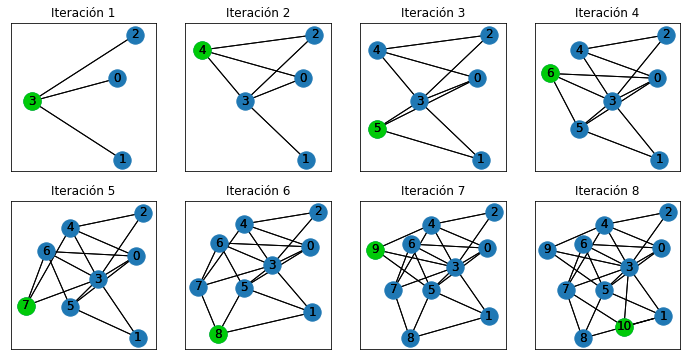

In [256]:
# Generamos un grafo aleatorio con 11 nodos, conectando cada nuevo nodo
# a 3 otros nodos ya existentes
max_n, m = 12, 3
plt.figure(num=None, figsize=(12, 6))
# Calculamos la posición final de todos los nodos del grafo
# (para visualizar siempre cada nodo en la misma posición)
g = nx.barabasi_albert_graph(n=max_n, m=m, seed=45)
pos = nx.kamada_kawai_layout(g)
# Generamos grafos de 4 a 11 nodos usando una semilla fijada
for i, n in enumerate(range(4, 12)):
    ax = plt.subplot(2, 4, i+1)
    plt.title("Iteración {}".format(i+1))
    g = nx.barabasi_albert_graph(n=n, m=m, seed=45)
    nx.draw_networkx(g, pos=pos)
    # Mostramos el nodo que se ha añadido en esta iteración en verde
    nx.draw_networkx(g, nodelist=[n-1], pos=pos, node_color='#00CA09')
    

Como podemos observar, el algoritmo de generación se inicializa con 3 nodos (0, 1 y 2) sin ninguna conexión. En la primera iteración, se añade el nodo 3, que tendrá una arista con cada uno de los nodos ya existentes. Después, se añade el nodo 4, que se conecta a los nodos 0, 2 y 3. En este caso, el nodo 3 era el que tenía más probabilidades de ser seleccionado como vecino, ya que tenía grado 3 (frente a los nodos 0, 1 y 2 que tenían grado 1). Este comportamiento se va repitiendo durante la ejecución del algoritmo. Dado que los nodos con más grado tienen más probabilidad de ser seleccionados como vecinos de los nuevos nodos, el modelo genera grafos que tienen *hubs* (nodos con grado mucho más alto que el resto). En el ejemplo que acabamos de generar, el nodo 3 tiene grado 9 al final de la generación (iteración 8), mientras que el segundo nodo con mayor grado tiene grado 6 (y corresponde al nodo 5):

In [257]:
# Mostramos los grados de los nodos en la iteración 8
g.degree()

DegreeView({0: 4, 1: 4, 2: 2, 3: 9, 4: 5, 5: 6, 6: 4, 7: 5, 8: 3, 9: 3, 10: 3})

### 5.2 Grafos dirigidos

Hasta ahora hemos visto generadores de grafos aleatorios que permiten crear grafos **no dirigidos**. Algunos de los generadores presentados disponen de variantes capaces de generar también grafos dirigidos.

Así, por ejemplo, la función [`gnp_random_graph`](https://networkx.github.io/documentation/stable/reference/generated/networkx.generators.random_graphs.gnm_random_graph.html#networkx.generators.random_graphs.gnm_random_graph) tiene un parámetro `directed` que permite especificar si queremos generar un grafo dirigido:

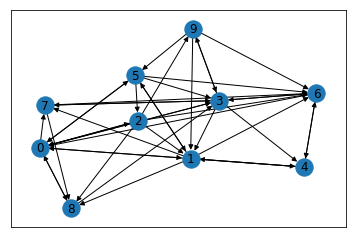

In [258]:
g = nx.gnp_random_graph(n=10, p=0.5, directed=True)
nx.draw_networkx(g)

El algoritmo de generación del grafo es exactamente el mismo, pero en este caso para cada par de nodos existen dos posibles aristas por generar (una en cada sentido). Esto hace que el número de posibles aristas a generar al crear el grafo dirigido sea el doble que en el caso del grafo no dirigido y, por lo tanto, el número de posibles grafos para un número fijado de nodos y aristas aumenta. Veámoslo con el ejemplo de los grafos de 4 nodos y 2 aristas:

In [259]:
# Generamos grafos aleatorios dirigidos y no dirigidos de 4 nodos y 2 aristas
# y comparamos el número de grafos existentes

n, m = 4, 2

generated_graphs_nodir = generate_gnm_graphs(n=n, m=m, num_its=10000, directed=False)
generated_graphs_dir = generate_gnm_graphs(n=n, m=m, num_its=10000, directed=True)

print("El número de grafos no dirigidos diferentes generados de {} nodos y {} aristas es: {}"
      .format(n, m, len(generated_graphs_nodir.keys())))
print("El número de grafos dirigidos diferentes generados de {} nodos y {} aristas es: {}"
      .format(n, m, len(generated_graphs_dir.keys())))

El número de grafos no dirigidos diferentes generados de 4 nodos y 2 aristas es: 15
El número de grafos dirigidos diferentes generados de 4 nodos y 2 aristas es: 66


In [260]:
# Creamos una función que calcule el número de grafos dirigidos
# existentes de n nodos y m aristas usando la fórmula con los coeficientes binomiales
# (el número de aristas se multiplica por 2 respecto al caso no dirigido)
def num_existing_directed_graphs(n, m):
    return binomial_coefficient(2*binomial_coefficient(n, 2), m)

# Calculamos el número de grafos dirigidos y no dirigidos de 4 nodos y 2 aristas
num_graphs_nodir = num_existing_graphs(n, m)
num_graphs_dir = num_existing_directed_graphs(n, m)

print("El número de grafos no dirigidos diferentes que existen de {} nodos y {} aristas es: {}"
      .format(n, m, num_graphs_nodir))
print("El número de grafos dirigidos diferentes que existen de {} nodos y {} aristas es: {}"
      .format(n, m, num_graphs_dir))

El número de grafos no dirigidos diferentes que existen de 4 nodos y 2 aristas es: 15
El número de grafos dirigidos diferentes que existen de 4 nodos y 2 aristas es: 66


## 6. Otros generadores de grafos

Los generadores de grafos que hemos visto hasta ahora permiten generar grafos de manera aleatoria. Networkx también dispone de funciones de creación de grafos deterministas, que nos facilitan generar grafos concretos que queramos usar en nuestros códigos.

Algunas de estas funciones permiten cargar grafos de redes reales que son usados ampliamente por la comunidad de análisis de datos de redes sociales. Por ejemplo, ya hemos visto en notebooks anteriores que podíamos cargar el grafo del club de karate de Zacarías directamente usando la función [`karate_club_graph`](https://networkx.github.io/documentation/stable/reference/generated/networkx.generators.social.karate_club_graph.html):


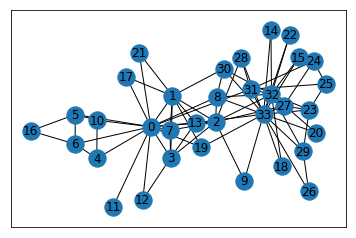

In [261]:
# Cargamos y visualizamos el grafo del club de karate
g = nx.karate_club_graph()
nx.draw_networkx(g)

Además del grafo del club de karate, también disponemos de funciones para cargar otros grafos populares en el análisis de redes sociales: las funciones [`davis_southern_women_graph`](https://networkx.github.io/documentation/stable/reference/generated/networkx.generators.social.davis_southern_women_graph.html#networkx.generators.social.davis_southern_women_graph), [`florentine_families_graph`](https://networkx.github.io/documentation/stable/reference/generated/networkx.generators.social.florentine_families_graph.html#networkx.generators.social.florentine_families_graph) y [`les_miserables_graph`](https://networkx.github.io/documentation/stable/reference/generated/networkx.generators.social.les_miserables_graph.html#networkx.generators.social.les_miserables_graph) pueden usarse de manera análoga a la del club de karate.

Networkx también dispone de generadores para algunos grafos *clásicos*, que tienen propiedades que los definen:

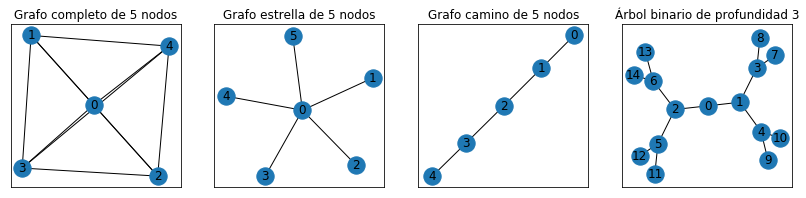

In [262]:
# Generamos 4 grafos clásicos y los visualizamos
plt.figure(num=None, figsize=(14, 3))

ax = plt.subplot(1, 4, 1)  
plt.title("Grafo completo de 5 nodos")
g = nx.classic.complete_graph(5)
nx.draw_networkx(g)

ax = plt.subplot(1, 4, 2)  
plt.title("Grafo estrella de 5 nodos")
g = nx.classic.star_graph(5)
nx.draw_networkx(g)

ax = plt.subplot(1, 4, 3)  
plt.title("Grafo camino de 5 nodos")
g = nx.classic.path_graph(5)
nx.draw_networkx(g)

ax = plt.subplot(1, 4, 4) 
plt.title("Árbol binario de profundidad 3")
g = nx.classic.balanced_tree(2, 3)
nx.draw_networkx(g)

Networkx también disponde de como generadores de grafos que, por sus características, tienen incluso un nombre que los identifica:

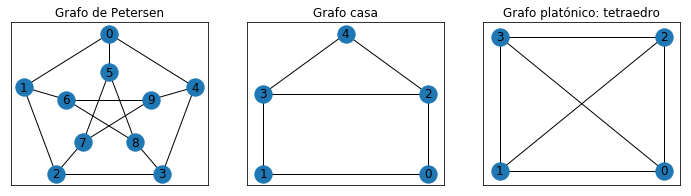

In [263]:
# Generamos 3 grafos con nombre y los visualizamos, especificando las posiciones de los
# nodos manualmente, para facilitar su identificación
plt.figure(num=None, figsize=(12, 3))

ax = plt.subplot(1, 3, 1)  
plt.title("Grafo de Petersen")
g = nx.small.petersen_graph()
pos = {0: [0, 1.0], 1: [-0.95, 0.31], 2: [-0.59, -0.81], 3: [0.59, -0.81], 4: [0.95, 0.31], 
       5: [0, 0.5], 6: [-0.48, 0.15], 7: [-0.29, -0.40], 8: [0.29, -0.40], 9: [0.47, 0.15]}
nx.draw_networkx(g, pos=pos)

ax = plt.subplot(1, 3, 2)  
plt.title("Grafo casa")
g = nx.small.house_graph()
pos = {0: [1, 0], 1: [0, 0], 2: [1, 1], 3: [0, 1], 4: [0.5, 1.75]}
nx.draw_networkx(g, pos=pos)

ax = plt.subplot(1, 3, 3)
plt.title("Grafo platónico: tetraedro")
g = nx.tetrahedral_graph()
pos = {0: [1, 0], 1: [0, 0], 2: [1, 1], 3: [0, 1]}
nx.draw_networkx(g, pos=pos)